In [40]:
import torch
import torchvision.transforms as T

from efficientnet_pytorch.model import EfficientNet
from efficientnet_pytorch.utils import efficientnet, efficientnet_params

from PIL import Image
import src.utils as utils
import IPython.display as display

device = 'mps'
img = "./timg/test2.jpeg"

# get image tensor
transform = T.Compose([
    T.Resize(224),
    T.ToTensor()
])
input = transform(Image.open(img)).to(device)

def get_bird_order():
    bird_names = set()
    with open('./birds.txt', 'r') as birdfile:
        birdtxt = birdfile.readlines()
    for line in birdtxt:
        line = line.strip()
        line_bird_names = line.split(' ')[1:]
        for bird in line_bird_names:
            bird_names.add(bird)
            
    return list(sorted(bird_names))

# get model
bird_order = get_bird_order()
model = utils.get_model(device, bird_order)

# Get index of first file path that doesn't exist
model_path_idx = utils.get_ckpt_index()
if model_path_idx == 0:
    raise "Error, no models to load"
else:
    model.load_state_dict(torch.load(utils.get_ckpt_path(model_path_idx-1)))

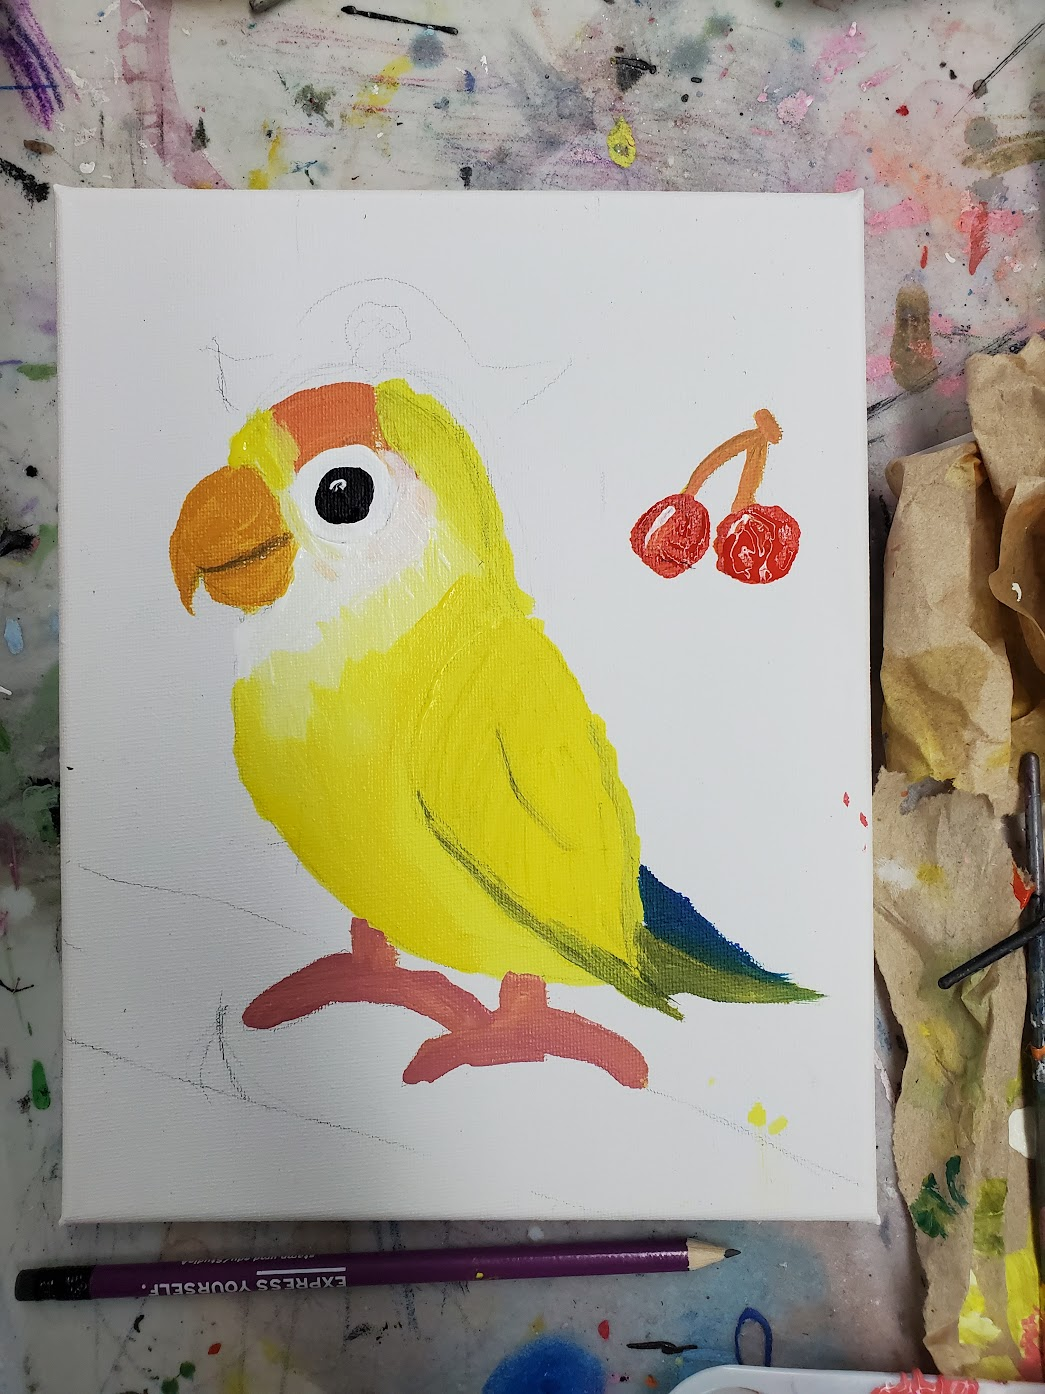

In [41]:
display.Image(filename=img)

In [46]:
model.eval()
bird_vec = model(input.unsqueeze(0))
bird_vec = torch.softmax(bird_vec.squeeze(), 0)
for i, bird in enumerate(bird_order):
    print(bird + ": " + str(round(bird_vec[i].item()* 1000) / 10) + "%")
print("Bird: ", utils.get_bird(bird_vec, bird_order))

RuntimeError: a Tensor with 5 elements cannot be converted to Scalar